# Multi Model RAG Chatbot with Generative AI with LangChain (2024)

## Install Libraries

In [ ]:
!pip install langchain unstructured[all-docs] pydantic lxml pillow tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 336.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cura

In [ ]:
!pip install -qU langchain chroma

In [ ]:
!pip install -qU langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.5 MB/s eta 0:00:00


In [ ]:
!pip install  -qU langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.4/362.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 18.3 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
import os
os.environ["OPENAI_API_KEY"] = userdata.get('openai_key')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import textwrap

from IPython.display import Markdown

def to_markdown(text):
  text = text.replace(".", " *")
  return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

## Data Loading and Partition PDF tables, text, and images

In [ ]:
!apt-get install poppler-utils tesseract-ocr -y libmagic-dev #sudo, brew

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libmagic-dev poppler-utils tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,107 kB of archives.
After this operation, 16.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libmagic-dev amd64 1:5.41-3ubuntu0.1 [105 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 te

In [ ]:
path = "/content/drive/MyDrive/GENAI-LLM/Projects/Multilabel RAG chatbot with Generative AI with LangChain (2024)"

In [ ]:
from unstructured.partition.auto import partition

# Get elements
raw_pdf_elements = partition(
                              filename="/content/drive/MyDrive/GENAI-LLM/Projects/Multilabel RAG chatbot with Generative AI with LangChain (2024)/Generative AI with LangChain (2024).pdf",
                              extract_images_in_pdf=True,
                              chunking_strategy="by_title",
                              max_characters=4000,    # Considering chunking_strategy, all chunks can contain a maximum of 4000 characters.
                              new_after_n_chars=3800, # Considering chunking_strategy, all chunks can typically contain up to 3800 characters.
                              combine_text_under_n_chars=2000,
                              image_output_dir_path=path, #file path where images will be saved
                              skip_infer_table_types=["jpg", "png", "heic"],
                              #url=""
)

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
raw_pdf_elements

# compositeElement=text chunk
# Table=table chunk

## Separating Table and Text Elements

In [ ]:
# This line imports the base64 module, which provides functions for encoding and decoding data using the Base64
# algorithm. Base64 encoding is often used to represent binary data (like images) in a text-based format.

text_elements = []
table_elements = []

for element in raw_pdf_elements:
  if element.category == "Table":
    table_elements.append(element)
  else:
    text_elements.append(element)

In [ ]:
text_elements

In [ ]:
table_elements

## Getting The Text Content of Table and Text Elements

In [ ]:
text_elements[11].text

'xviii\n\nxviii\n\nChapter 9, Generative AI in Production, addresses the complexities of deploying LLMs within re- al-world applications, covering best practices for ensuring performance, meeting regulatory requirements, robustness at scale, and effective monitoring. It underscores the importance of evaluation, observability, and systematic operation to make generative AI beneficial in customer engagement and decision-making with financial consequences. It also outlines practical strat- egies for deployment and ongoing monitoring of LLM apps using tools like Fast API, Ray, and newcomers such as LangServe and LangSmith. These tools can provide automated evaluation and metrics that support the responsible adoption of generative AI across sectors.\n\nChapter 10, The Future of Generative Models, ventures into the potential advancements and so- cio-technical challenges of generative AI. It examines the economic and societal impacts of these technologies, debating job displacement, misinform

In [ ]:
table_elements[11].text

'Database provider Description Busi- ness model First re- leased License Index- ing Organiza- tion Chroma Commercial open- source embedding store (Partly open) SaaS 2022 Apache-2.0 HNSW Chroma Inc Qdrant Managed/ self-hosted vector search engine and database with extended filtering support (Partly open) SaaS 2021 Apache 2.0 HNSW Qdrant Solutions GmbH Milvus Vector database built for scalable similarity search (Partly open) SaaS 2019 BSD IVF, HNSW, PQ, and more Zilliz Weaviate Cloud-native vec- tor database that stores both objects and vectors Open SaaS Started in 2018 as a tradition- al graph database, first re- leased in 2019 BSD Cus- tom HNSW algo- rithm that sup- ports CRUD SeMI Technolo- gies'

In [ ]:
table_elements = [i.text for i in table_elements] # convert table elements to text
text_elements = [i.text for i in text_elements] # convert text elements to text

print(len(table_elements))
print(len(text_elements))

33
258


In [ ]:
for i, j in enumerate(text_elements):
  print(len(text_elements[i]))

3080
2088
782
2705
1864
367
301
132
2735
2966
2856
2337
2124
2923
1765
2588
2481
3055
2429
2515
1435
3025
2349
2123
2390
1476
2566
2371
2199
1124
3376
2679
1677
2976
2481
2688
1659
2577
2341
2240
3745
3632
124
2227
1581
3479
2108
2131
1407
3893
736
3823
1355
3124
3807
1014
3381
3617
3902
765
3917
664
3892
1600
3409
2903
1035
2909
2864
3912
3876
1096
3982
2201
3851
3391
2298
2215
3987
2420
3834
2672
2623
2079
2604
3270
2106
248
3773
3696
2339
1431
3956
3716
2952
2504
2300
2237
3704
2342
2544
3555
2382
3127
3818
3597
3776
3924
3592
3875
2102
3947
3524
3753
1149
41
2213
1717
3892
2355
2005
2148
505
3983
2052
1190
3636
3999
3962
2558
3893
3690
2183
1630
3575
3473
1683
3879
2110
2181
3901
2379
2781
1244
2863
3514
48
3141
3376
1681
2382
1688
3487
1755
3769
939
4000
1667
2567
2778
2603
3948
1101
2969
3721
2026
1834
2397
3522
1572
2811
588
334
3952
2040
3973
166
3937
667
3746
2230
3909
2976
3656
1774
9
592
3466
1557
2498
2651
2013
3781
2348
292
3747
2287
3502
2499
3323
2257
3778
2089
2663
1511

## Convert Images to A Text-based Representation Using Base64 Encoding

In [ ]:
import base64

def encode_image(image_path): # This function takes an image_path (the path to an image file) as input.
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')   #The image data is read and encoded using Base64 encoding (base64.b64encode).
    # The encoded data is then converted to a UTF-8 string and returned. We will use this encoded string representation of the image to convert
    # the image into a text-based embedding vector.

## Separating Image Elements

In [ ]:
import os
output_path = "/content/figures"

os.listdir(output_path)

['figure-153-52.jpg',
 'figure-165-56.jpg',
 'figure-266-85.jpg',
 'figure-106-37.jpg',
 'figure-345-98.jpg',
 'figure-22-5.jpg',
 'figure-66-24.jpg',
 'figure-257-81.jpg',
 'figure-294-88.jpg',
 'figure-107-38.jpg',
 'figure-67-26.jpg',
 'figure-307-92.jpg',
 'figure-161-55.jpg',
 'figure-1-1.jpg',
 'figure-76-29.jpg',
 'figure-118-41.jpg',
 'figure-44-15.jpg',
 'figure-182-59.jpg',
 'figure-55-18.jpg',
 'figure-58-19.jpg',
 'figure-315-93.jpg',
 'figure-123-43.jpg',
 'figure-147-50.jpg',
 'figure-318-95.jpg',
 'figure-52-17.jpg',
 'figure-320-96.jpg',
 'figure-98-34.jpg',
 'figure-201-65.jpg',
 'figure-360-103.jpg',
 'figure-199-63.jpg',
 'figure-348-100.jpg',
 'figure-150-51.jpg',
 'figure-97-33.jpg',
 'figure-286-87.jpg',
 'figure-238-75.jpg',
 'figure-29-10.jpg',
 'figure-316-94.jpg',
 'figure-37-13.jpg',
 'figure-183-61.jpg',
 'figure-237-74.jpg',
 'figure-83-30.jpg',
 'figure-159-54.jpg',
 'figure-246-78.jpg',
 'figure-63-20.jpg',
 'figure-102-35.jpg',
 'figure-146-49.jpg',
 'fi

In [ ]:
image_elements = []

for image_file in os.listdir(output_path): # The images extracted from the pdf document and saved in the figures file are drawn one by one.
  if image_file.endswith(('.png', '.jpg', '.jpeg')):
    image_path = os.path.join(output_path, image_file)
    encoded_image = encode_image(image_path) # Images in jpg format are encoded as base64 so that they can be processed by LLMs.
    image_elements.append(encoded_image)# Images encoded as base64 are appended to the image_elements list

print(len(image_elements))

103


In [ ]:
os.path.join(output_path, "figure-200-64.jpg")

'/content/figures/figure-200-64.jpg'

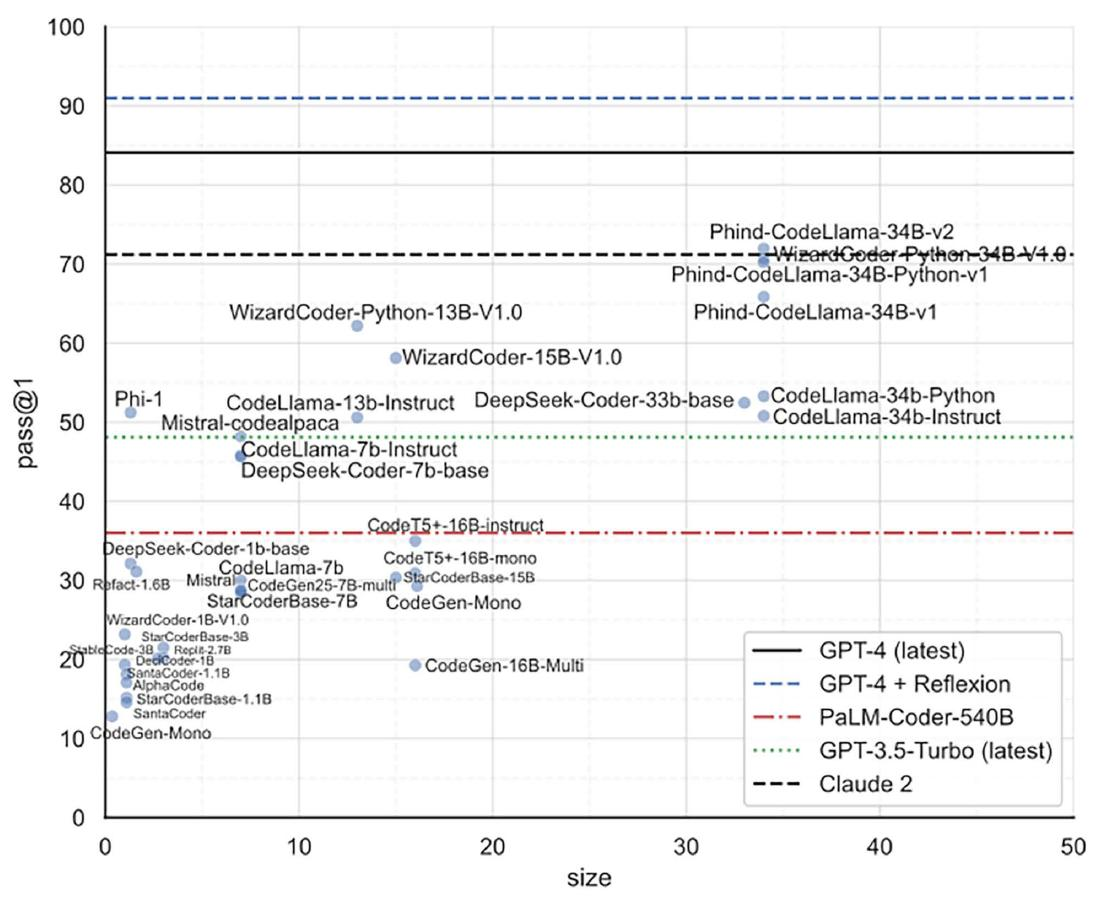

In [ ]:
from PIL import Image

image = Image.open("/content/figures/figure-200-64.jpg")
image

## Summarize Original Text, Tables and Images.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.schema.messages import HumanMessage, SystemMessage, AIMessage

chain_gpt_4o_mini = ChatOpenAI(model="gpt-4o-mini", max_tokens=1024)

# Function for text summaries
def summarize_text(text_element):
  prompt = f"Summarize the following text: \n\ntext:{text_element}\n\nSummary:"
  response = chain_gpt_4o_mini.invoke([HumanMessage(content=prompt)])
  return response.content

# Function for table summaries
def summarize_table(table_element):
    prompt = f"Summarize the following table:\n\ntable:{table_element}\n\nSummary:"
    response = chain_gpt_4o_mini.invoke([HumanMessage(content=prompt)])
    return response.content

# Function for image summaries
def summarize_image(encoded_image):
    prompt = [
        SystemMessage(content="You are a bot that is good at analyzing images."),
        HumanMessage(content=[
            {"type": "text", "text": "Describe the contents of this image."},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{encoded_image}" # data:[MIME type];base64,[Base64 encoded data]
                },
            },
        ])
    ]
    response = chain_gpt_4o_mini.invoke(prompt)
    return response.content

In [ ]:
# Processing table elements with feedback
table_summaries = []
for i, te in enumerate(table_elements):
    summary = summarize_table(te)
    table_summaries.append(summary)
    print(f"{i + 1}th element of tables processed.")

1th element of tables processed.
2th element of tables processed.
3th element of tables processed.
4th element of tables processed.
5th element of tables processed.
6th element of tables processed.
7th element of tables processed.
8th element of tables processed.
9th element of tables processed.
10th element of tables processed.
11th element of tables processed.
12th element of tables processed.
13th element of tables processed.
14th element of tables processed.
15th element of tables processed.
16th element of tables processed.
17th element of tables processed.
18th element of tables processed.
19th element of tables processed.
20th element of tables processed.
21th element of tables processed.
22th element of tables processed.
23th element of tables processed.
24th element of tables processed.
25th element of tables processed.
26th element of tables processed.
27th element of tables processed.
28th element of tables processed.
29th element of tables processed.
30th element of tables 

In [ ]:
# Processing text elements with feedback
text_summaries = []
for i, te in enumerate(text_elements):
    summary = summarize_text(te)
    text_summaries.append(summary)
    print(f"{i + 1}th element of texts processed.")

1th element of texts processed.
2th element of texts processed.
3th element of texts processed.
4th element of texts processed.
5th element of texts processed.
6th element of texts processed.
7th element of texts processed.
8th element of texts processed.
9th element of texts processed.
10th element of texts processed.
11th element of texts processed.
12th element of texts processed.
13th element of texts processed.
14th element of texts processed.
15th element of texts processed.
16th element of texts processed.
17th element of texts processed.
18th element of texts processed.
19th element of texts processed.
20th element of texts processed.
21th element of texts processed.
22th element of texts processed.
23th element of texts processed.
24th element of texts processed.
25th element of texts processed.
26th element of texts processed.
27th element of texts processed.
28th element of texts processed.
29th element of texts processed.
30th element of texts processed.
31th element of tex

In [ ]:
# Processing image elements with feedback
image_summaries = []
for i, ie in enumerate(image_elements):
    summary = summarize_image(ie)
    image_summaries.append(summary)
    print(f"{i + 1}th element of images processed.")

1th element of images processed.
2th element of images processed.
3th element of images processed.
4th element of images processed.
5th element of images processed.
6th element of images processed.
7th element of images processed.
8th element of images processed.
9th element of images processed.
10th element of images processed.
11th element of images processed.
12th element of images processed.
13th element of images processed.
14th element of images processed.
15th element of images processed.
16th element of images processed.
17th element of images processed.
18th element of images processed.
19th element of images processed.
20th element of images processed.
21th element of images processed.
22th element of images processed.
23th element of images processed.
24th element of images processed.
25th element of images processed.
26th element of images processed.
27th element of images processed.
28th element of images processed.
29th element of images processed.
30th element of images 

## Multi-vector retriever

In [ ]:
!pip install langchain-chroma

In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.schema.document import Document
from langchain.storage import InMemoryStore
from langchain_chroma import Chroma

#This code builds a multi-vector retrieval system (multi-vector retriever) using the LangChain library.
#This system represents text data in vector space and then uses it to retrieve similar text fragments.

# Initialize the vector store and storage layer
vectorstore = Chroma(#collection_name="summaries",
                     embedding_function=OpenAIEmbeddings(model="text-embedding-3-large",
                                                         dimensions=3072),
                     persist_directory="/content/drive/MyDrive/GENAI-LLM/Projects/Multilabel RAG chatbot with Generative AI with LangChain (2024)/vectorstore1") # /content/drive/MyDrive/vectorstore
store = InMemoryStore()
id_key = "doc_id"

# Initialize the retriever
retriever = MultiVectorRetriever(vectorstore=vectorstore,
                                 docstore=store,
                                 id_key=id_key)

## Uploading Summary Documents to Vectorstore and Original Documents to Docstore

In [ ]:
# Function to add documents to the retriever
import uuid #Universally Unique Identifier

def add_documents_to_retriever(summaries, original_contents):
    doc_ids = [str(uuid.uuid4()) for _ in summaries]
    summary_docs = [
        Document(page_content=s, metadata={id_key: doc_ids[i]}) # summaries are converted into document objects and the doc_id corresponding to each summary document is defined.
        for i, s in enumerate(summaries)
    ]

    original_docs = [
        Document(page_content=s, metadata={id_key: doc_ids[i]}) # the original data is converted into a document object and the doc_id corresponding to each original data is defined.
        for i, s in enumerate(original_contents)
    ]

    # The original data corresponding to each summary was indexed with the same doc_id.
    retriever.vectorstore.add_documents(summary_docs)          # The summaries are sent to vectorstore.
    retriever.docstore.mset(list(zip(doc_ids, original_docs))) # The original data corresponding to each summary is sent to docstore as list(zip(doc_ids, original_docs)) format.

In [ ]:
# Add text summaries to vectorstore and the original text corresponding to each summary is sent to docstore
add_documents_to_retriever(text_summaries, text_elements)

# Add table summaries to vectorstore and the original table corresponding to each summary is sent to docstore
add_documents_to_retriever(table_summaries, table_elements)

# Add image summaries to vectorstore and the original image corresponding to each summary is sent to docstore
add_documents_to_retriever(image_summaries, image_elements)

## Save and Load Docstore and Vectorstore

In [ ]:
# get docstore
docstore_store= retriever.docstore
docstore_store

In [ ]:
# save the docstore to colab drive/google drive

import pickle

with open('/content/drive/MyDrive/GENAI-LLM/Projects/Multilabel RAG chatbot with Generative AI with LangChain (2024)/docstore.pickle', 'wb') as f: #/content/drive/MyDrive/docstore.pickle'
    pickle.dump(docstore_store, f)

In [ ]:
# load the docstore from colab drive/google drive

with open('/content/drive/MyDrive/GENAI-LLM/Projects/Multilabel RAG chatbot with Generative AI with LangChain (2024)/docstore.pickle', 'rb') as f: #/content/drive/MyDrive/docstore.pickle'
    loaded_docstore = pickle.load(f)
loaded_docstore

In [ ]:
loaded_vecstore=Chroma(persist_directory="/content/drive/MyDrive/GENAI-LLM/Projects/Multilabel RAG chatbot with Generative AI with LangChain (2024)/vectorstore1", ## /content/drive/MyDrive/vectorstore
                       embedding_function=OpenAIEmbeddings(model="text-embedding-3-large", dimension=3072))

/usr/local/lib/python3.10/dist-packages/langchain_openai/embeddings/base.py:270: UserWarning: WARNING! dimension is not default parameter.
                    dimension was transferred to model_kwargs.
                    Please confirm that dimension is what you intended.
  warnings.warn(


In [ ]:
retriever_new = MultiVectorRetriever(vectorstore=loaded_vecstore,
                                     docstore=loaded_docstore,
                                     id_key="doc_id")

## Retrieval

In [ ]:
query="How to understand retrieval and vectors? explain"

doc_search= retriever.invoke(query) #retriever_new
doc_search

# get four most relevant/similar documents

[Document(metadata={'doc_id': 'fe057ff5-44f5-4a35-aee1-9c19cba3ebcc'}, page_content='YY\n\nVector search refers to the process of searching for similar vectors among other stored vectors, for example, in a vector database, based on their similarity to a given query vector. Vector search is commonly used in various applications such as recommen- dation systems, image and text search, and similarity-based retrieval. The goal of vector search is to efficiently and accurately retrieve vectors that are most similar to the query vector, typically using similarity measures such as the dot product or cosine similarity.\n\nVector storage refers to the mechanism used to store vector embeddings and is also relevant to how those vector embeddings can be retrieved. Vector storage can be a standalone solution that is specifically designed to store and retrieve vector embeddings efficiently. On the other hand, vector databases are purpose-built to manage vector embeddings and provide several advantag

In [ ]:
doc_search[0].page_content

'YY\n\nVector search refers to the process of searching for similar vectors among other stored vectors, for example, in a vector database, based on their similarity to a given query vector. Vector search is commonly used in various applications such as recommen- dation systems, image and text search, and similarity-based retrieval. The goal of vector search is to efficiently and accurately retrieve vectors that are most similar to the query vector, typically using similarity measures such as the dot product or cosine similarity.\n\nVector storage refers to the mechanism used to store vector embeddings and is also relevant to how those vector embeddings can be retrieved. Vector storage can be a standalone solution that is specifically designed to store and retrieve vector embeddings efficiently. On the other hand, vector databases are purpose-built to manage vector embeddings and provide several advantages over using standalone vector indices like Faiss.\n\n139\n\n140\n\nBuilding a Chat

In [ ]:
query="What are Map-Reduce pipelines? explain"

doc_search= retriever.invoke(query) #retriever_new
doc_search[0].page_content


'Map-Reduce pipelines\n\nMap-Reduce pipelines LangChain supports a map reduce approach for processing documents using LLMs, which al- lows for efficient processing and analysis of documents. A chain can be applied to each document individually and then we combine the outputs into a single document.\n\nTo summarize long documents, we can first split the document into smaller parts (chunks) that are suitable for the token context length of the LLM, and then a map-reduce chain can summarize these chunks independently before recombining. This scales summarization to any length of text while controlling chunk size.\n\nThe key steps are:\n\n1. Map: Each document is passed through a summarization chain (LLM chain).\n\n2. Collapse (optional): The summarized documents are combined into a single document.\n\n3. Reduce: The collapsed document goes through a final LLM chain to produce the output.\n\nSo, the map step applies a chain to each document in parallel. The reduce step aggregates the mappe

In [ ]:
query="What is Automatic fact-checking pipeline in three stages? explain"

doc_search= retriever.invoke(query) #retriever_new


[Document(metadata={'doc_id': '122a1f38-9a3d-41b8-ab20-49c2429ac7c3'}, page_content="Figure 4.1: Automatic fact-checking pipeline in three stages\n\nChapter 4\n\nPre-trained LLMs contain extensive world knowledge that can be prompted for facts. Additionally, external tools can search knowledge bases, Wikipedia, textbooks, and corpora for evidence. By grounding claims in data, fact-checking makes LLMs more reliable.\n\nPre-trained LLMs contain extensive world knowledge from their training data. Starting with the 24-layer BERT-Large in 2018, language models have been pre-trained on large knowledge bases such as Wikipedia; therefore, they would be able to answer knowledge questions from Wikipedia or – since their training set increasingly includes other sources – the internet, textbooks, arXiv, and GitHub.\n\nWe can prompt them with masking and other techniques to retrieve facts for evidence. For exam- ple, to answer the question “Where is Microsoft’s headquarters located?”, the question 

In [ ]:
doc_search[0].page_content

"Figure 4.1: Automatic fact-checking pipeline in three stages\n\nChapter 4\n\nPre-trained LLMs contain extensive world knowledge that can be prompted for facts. Additionally, external tools can search knowledge bases, Wikipedia, textbooks, and corpora for evidence. By grounding claims in data, fact-checking makes LLMs more reliable.\n\nPre-trained LLMs contain extensive world knowledge from their training data. Starting with the 24-layer BERT-Large in 2018, language models have been pre-trained on large knowledge bases such as Wikipedia; therefore, they would be able to answer knowledge questions from Wikipedia or – since their training set increasingly includes other sources – the internet, textbooks, arXiv, and GitHub.\n\nWe can prompt them with masking and other techniques to retrieve facts for evidence. For exam- ple, to answer the question “Where is Microsoft’s headquarters located?”, the question would be rewritten as “Microsoft’s headquarters is in [MASK]” and fed into a languag

## Separating The Elements Returned by Multivector Retriver Into Text and Images

In [ ]:
# We parse the first four contents that are most similar to the question/query we asked above as base64 image and text data.
# because we need to give text and image data to the model separately.
from base64 import b64decode, b64encode
def split_image_text_types(docs):
    ''' Split base64-encoded images and texts '''
    b64 = []  # an empty list to hold base64 encoded images
    text = [] # An empty list to hold tables with plain text
    for doc in docs:
        try:
            b64decode(doc.page_content)   # Try to parse the string expression in Base64 form as binary data
            b64.append(doc.page_content)  # If successful, add to list 'b64' (It will be successful if the document is in base64 format)
        except Exception as e:            # # If it fails/returns error, an exception is thrown (If the document is in text format, an error will occur)
            text.append(doc.page_content) # Treat it as text and add it to the 'text' list
    return {
        "images": b64,                    # Returns output as a dict
        "texts": text
    }
docs_by_type = split_image_text_types(doc_search)

In [ ]:
docs_by_type["images"][0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAExBBoDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD37AowKWigBMCjApk8y29vJMyuyxqWKxoXY4GcBRyT7Csiwkvtf069TV9LfT7WcmOGE3BE7REdX2H5CfQEkd+aALsmp2otLu4t2+2G1yJIrTEkgYDOzaP4sEce4qpo+p6lqtpcTT6JPpRH/Hut5IjNJx1ZUJ2844JzV3S9K0/

## Visualizing Images Returned by Multivector Retriver

image shape: (1050, 305)


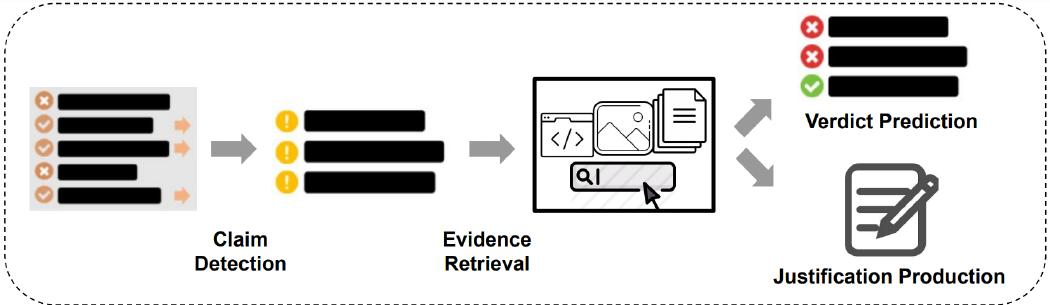

In [ ]:
# With this function, we first convert the string expression in base64 form to image and then check its resolution.

from IPython.display import display, HTML
from PIL import Image
import io

def plt_img_base64(img_base64):
    image = Image.open(io.BytesIO(b64decode(img_base64))) # It first analyzes the Base64 string, which is the input parameter,
                                                          # as binary data and then converts this binary data into image data in bytes.

    width, height=image.size
    print(f"image shape: ({width}, {height})") #get image shape

    # Display the image
    return image

plt_img_base64(docs_by_type["images"][0])

## Resizing Images Returned by Multivector Retriver

In [ ]:
# We can resize the image to the size we want with the function below. LLMs charge higher for high resolution images.
# However, the better the resolution, the better the analysis of the image.

def resize_base64_image(base64_string, size=(128,128)):
  """
  Resize an image encoded as a Base64 string
  """
  from base64 import b64encode
  # Decode the base64 string
  img_data = b64decode(base64_string)
  img = Image.open(io.BytesIO(img_data))

  # Resize the image
  resized_img = img.resize(size, Image.LANCZOS) # The image is edited to the desired size.
                                                # Image.LANCZOS is the resizing algorithm. Generally provides high quality.

  # Save the resized image to a bytes buffer
  buffered = io.BytesIO() # we create temporary memory.
  resized_img.save(buffered, format=img.format) #We save the resized image into temporary memory.

  # Encode the resized image to Base64
  return b64encode(buffered.getvalue()).decode("utf-8") # We convert the new size image we saved into temporary memory back to base64.

In [ ]:
# We resize the images in the docs_by_type dict with the resize_base64_image function.
docs_by_type["images"]=[resize_base64_image(i, size=(256,256)) for i in docs_by_type["images"]]

image shape: (256, 256)


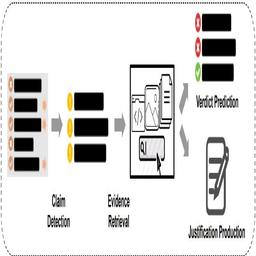

In [ ]:
plt_img_base64(docs_by_type["images"][0])

## Retrieval Answer for Questions From Models

In [ ]:
# The function below returns an answer by taking all these contents into consideration, depending on whether the contents most similar to
# the question we ask are text/table or image.
def prompt_func(dict, question):
    format_texts = "\n".join(dict["texts"])

    messages = [
        {"type": "text", "text": f"""Answer the question based only on the following context, which can include text, tables and the below image(s) if available:
    Question: {question}

    Text and tables:
    {format_texts}

    """}
    ]

    # Iterate through the images
    for image_data in dict['images']:
        messages.append(
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_data}"}}
        )

    return HumanMessage(content=messages)

In [ ]:
query

'What is Automatic fact-checking pipeline in three stages? explain'

In [ ]:
docs_by_type

{'images': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEAAQADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3yWSOGJ5JGCoilmY9AB1NZCpqmoMLiG8SztsgxosQkaVMqQxLY25XcMY4yD1rQvN0jwwRzLG7uGIK5LIpBYD65A/GrIGBQBjDTNY2BTrrFtoBb7HHydqjP5hj/wACx2FDaZrBLbddYAg4/wBDj4zvx+W5P++

HumanMessage(content=[{'type': 'text', 'text': 'Answer the question based only on the following context, which can include text, tables and the below image(s) if available:\n    Question: What is Automatic fact-checking pipeline in three stages? explain\n\n    Text and tables:\n    Figure 4.1: Automatic fact-checking pipeline in three stages\n\nChapter 4\n\nPre-trained LLMs contain extensive world knowledge that can be prompted for facts. Additionally, external tools can search knowledge bases, Wikipedia, textbooks, and corpora for evidence. By grounding claims in data, fact-checking makes LLMs more reliable.\n\nPre-trained LLMs contain extensive world knowledge from their training data. Starting with the 24-layer BERT-Large in 2018, language models have been pre-trained on large knowledge bases such as Wikipedia; therefore, they would be able to answer knowledge questions from Wikipedia or – since their training set increasingly includes other sources – the internet, textbooks, arXiv,
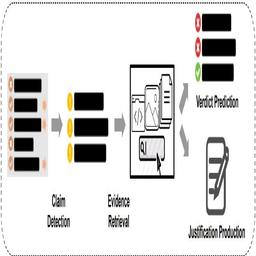

In [ ]:
input = prompt_func(docs_by_type, query)
input

In [ ]:
model = ChatOpenAI(temperature=0.0,
                   model="gpt-4o-mini",
                   max_tokens=1024,
                   top_p=1.0) # vision models can work on both text and images

output=model.invoke([input])
output

AIMessage(content='The Automatic fact-checking pipeline consists of three stages:\n\n1. **Claim Detection**: This stage involves identifying and extracting claims from the text that need to be verified. It focuses on recognizing statements that can be fact-checked.\n\n2. **Evidence Retrieval**: In this stage, relevant evidence is gathered from various sources, such as knowledge bases, Wikipedia, and other corpora. This evidence is used to support or refute the claims identified in the first stage.\n\n3. **Verdict Prediction and Justification Production**: The final stage involves analyzing the retrieved evidence to determine the truthfulness of the claims. It produces a verdict (true or false) and provides justifications for the decision based on the evidence collected.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 145, 'prompt_tokens': 10095, 'total_tokens': 10240}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_507c9

In [ ]:
to_markdown(output.content)

> The Automatic fact-checking pipeline consists of three stages:
> 
> 1 * **Claim Detection**: This stage involves identifying and extracting claims from the text that need to be verified * It focuses on recognizing statements that can be fact-checked *
> 
> 2 * **Evidence Retrieval**: In this stage, relevant evidence is gathered from various sources, such as knowledge bases, Wikipedia, and other corpora * This evidence is used to support or refute the claims identified in the first stage *
> 
> 3 * **Verdict Prediction and Justification Production**: The final stage involves analyzing the retrieved evidence to determine the truthfulness of the claims * It produces a verdict (true or false) and provides justifications for the decision based on the evidence collected *

## Pipeline

In [ ]:
# We collect all the operations we have done above under the prep_data function and turn them into a single function.

# This function also returns images if there are any related to the question we asked.

def prep_data(query, size=(256,256)):

  doc_search= retriever.invoke(query)
  docs_by_type = split_image_text_types(doc_search)
  docs_by_type["images"]=[resize_base64_image(i, size=size) for i in docs_by_type["images"]]
  input=prompt_func(docs_by_type, query)
  model=ChatOpenAI(temperature=0.0,
                   model="gpt-4o-mini",
                   max_tokens=1024,
                   top_p=1.0)
  output=model.invoke([input])
  display(to_markdown(output.content))

  for i in docs_by_type["images"]:
    display(plt_img_base64(i))

> The Automatic fact-checking pipeline consists of three stages:
> 
> 1 * **Claim Detection**: This stage involves identifying and extracting claims from the text that need to be verified * It focuses on recognizing statements that can be fact-checked *
> 
> 2 * **Evidence Retrieval**: In this stage, relevant evidence is gathered from various sources, such as knowledge bases, Wikipedia, and other corpora * This evidence is used to support or refute the claims identified in the first stage *
> 
> 3 * **Verdict Prediction and Justification Production**: The final stage involves analyzing the retrieved evidence to determine the truthfulness of the claims * It produces a verdict (true or false) and provides justifications for the decision based on the evidence collected *

image shape: (256, 256)


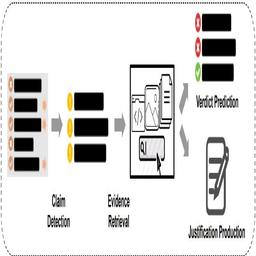

In [ ]:
prep_data(query)

In [ ]:
query = "What is LangChain and why should you use it?"

prep_data(query)

> LangChain is an open-source Python framework designed for building applications powered by large language models (LLMs) * It simplifies the development of sophisticated LLM applications by providing modular, easy-to-use components that connect language models with external data sources and services * 
> 
> You should use LangChain because it offers several key benefits:
> 
> 1 * **Modular Architecture**: LangChain's flexible design allows developers to integrate various services beyond just LLMs, making it adaptable to different application needs *
> 
> 2 * **Advanced Interactions**: It supports complex workflows through components like chains, agents, tools, and memory, enabling applications to interact dynamically with users and environments *
> 
> 3 * **Goal-Driven Agents**: LangChain allows for goal-oriented execution, where agents can plan and execute chains of logic to achieve specific objectives, rather than making isolated calls *
> 
> 4 * **Statefulness**: The framework incorporates memory, enabling applications to maintain context and coherence across interactions, which is crucial for conversational and interactive applications *
> 
> 5 * **Open-Source and Community Support**: Being open-source, LangChain benefits from community contributions, resources, and discussions that help developers overcome challenges and accelerate their learning process *
> 
> Overall, LangChain reduces the complexity of LLM application development, making it easier for developers to create impactful and reliable AI systems *

> LangChain works by combining various components such as chains, agents, memory, and tools to create advanced applications using large language models (LLMs) * 
> 
> 1 * **Chains**: These define reusable logic by sequencing components, allowing for structured workflows *
> 
> 2 * **Agents**: Agents are autonomous entities that orchestrate chains based on observations of the environment * They decide which actions to take using LLMs as reasoning engines, enabling dynamic and goal-oriented execution *
> 
> 3 * **Memory**: This component allows for statefulness by persisting information across interactions, addressing the limitation of statelessness in chains and agents *
> 
> 4 * **Tools**: Agents can call external functions or services to perform real-world actions, enhancing their capabilities *
> 
> Together, these components enable the development of sophisticated, interactive applications that can handle complex workflows and adapt to user inputs and environmental changes *

image shape: (256, 256)


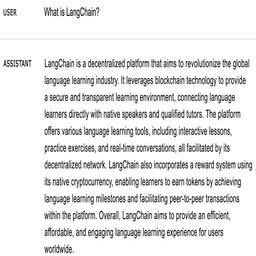

In [ ]:
query = " How does LangChain work?"

prep_data(query)

In [ ]:
query = "What kind of tools are available in LangChain?"

prep_data(query)

> LangChain offers a variety of tools and components to facilitate the development of sophisticated LLM applications * Some of the key tools available in LangChain include:
> 
> 1 * **Document Loaders**: These tools allow for the ingestion of data from various sources, such as Microsoft Word documents, HTML, PDFs, and more, into documents containing text and metadata *
> 
> 2 * **Data Loaders**: Modules for storing data and interacting with external systems, enabling data retrieval from sources like web searches or databases *
> 
> 3 * **Text Embedding Models**: These create vector representations of text to enable semantic search and improve the performance of applications like question answering and summarization *
> 
> 4 * **Vector Stores**: Tools for indexing embedded document vectors for efficient similarity-based retrieval, supporting various integrations like Elasticsearch and Pinecone *
> 
> 5 * **Memory Options**: Various memory types, such as ConversationBufferMemory and EntityMemory, allow for the persistence of information across conversations and workflows *
> 
> 6 * **Toolkits**: Groups of tools that share resources, enabling modular integration of external services like databases and APIs *
> 
> 7 * **Calculators**: Simple tools for performing arithmetic operations, allowing language models to solve math problems *
> 
> 8 * **Machine Translators**: Tools that enable language models to process and understand text in multiple languages *
> 
> 9 * **Maps**: Integration with mapping services to retrieve location information and assist with route planning *
> 
> These tools enhance the capabilities of LLMs by allowing them to interact with external data and services, thereby enabling the creation of more advanced applications *

> A transformer is a deep neural network architecture designed for natural language processing (NLP) tasks * It features an encoder-decoder structure, where the encoder processes an input sequence and generates hidden states, while the decoder uses these hidden states to produce an output sequence * Key components of transformers include:
> 
> 1 * **Multi-Head Attention**: Allows the model to focus on different parts of the input sequence simultaneously *
> 2 * **Positional Encoding**: Injects information about the order of words since transformers process all words in parallel *
> 3 * **Layer Normalization**: Stabilizes learning by normalizing inputs across features *
> 
> Transformers have significantly advanced NLP, particularly in tasks like translation and language understanding, outperforming previous models such as recurrent neural networks *

image shape: (256, 256)


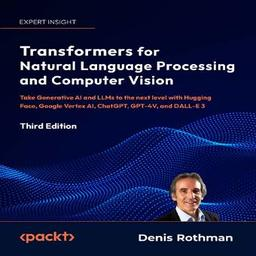

In [ ]:
query = "What is transformer?"

prep_data(query)

In [ ]:
query = "Who is Alan Turing?"

prep_data(query)

> Alan Turing was a pioneering mathematician and computer scientist known for his significant contributions to the field of artificial intelligence * He proposed the Turing test in 1950, which established a benchmark for assessing a computer's ability to exhibit intelligent behavior equivalent to, or indistinguishable from, that of a human * Turing's work laid the philosophical foundation for AI and has influenced ongoing discussions about machine intelligence and its capabilities *

> The provided context does not contain any information about Da Vinci * Therefore, I cannot answer the question based on the given material *

image shape: (256, 256)


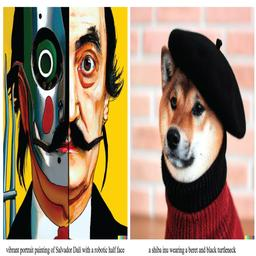

image shape: (256, 256)


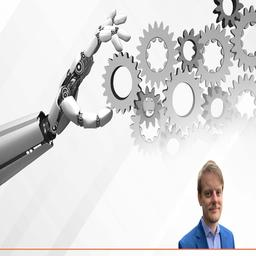

image shape: (256, 256)


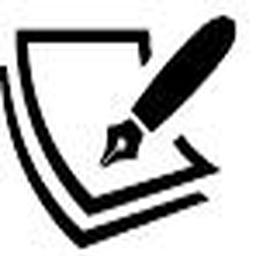

image shape: (256, 256)


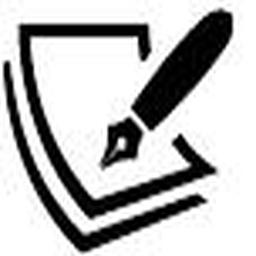

In [ ]:
query = "Who is Da Vinci?"

prep_data(query)